# Normality Test

In [ ]:
import seaborn as sns 
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


ValueError: x and y must have same first dimension, but have shapes (40,) and (1,)

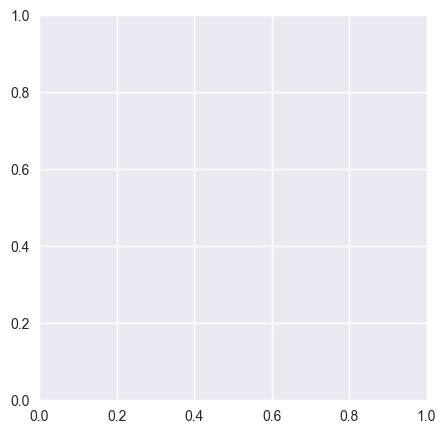

In [3]:

def pdf(x):
    mean= np.mean(x)
    std= np.std(x)
    y_out= 1/(std* np.sqrt(2*np.pi))*np.exp(-mean)**2/(2*std**2)
    return y_out

x=np.arange(-2,2,0.1)
y=pdf(x)

# ploting
plt.style.use('seaborn')
plt.figure(figsize=(5,5)) 
plt.plot(x, y)

# Normal Distribution and it test

In [4]:
df=df.iloc[:,:-1]
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

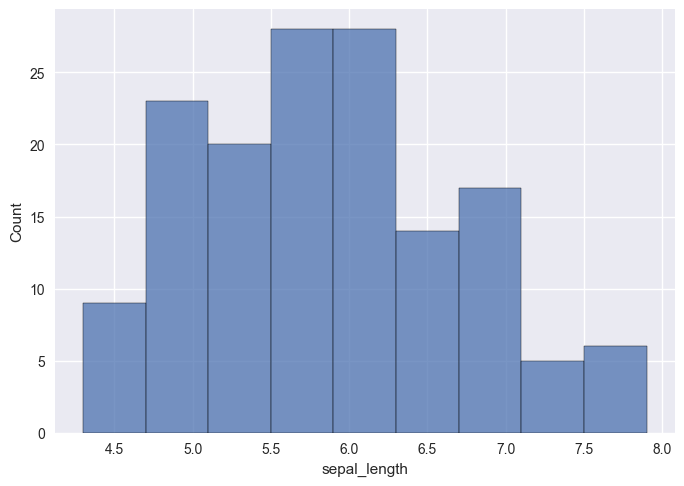

In [5]:
# histogram test
sns.histplot(df['sepal_length'])

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

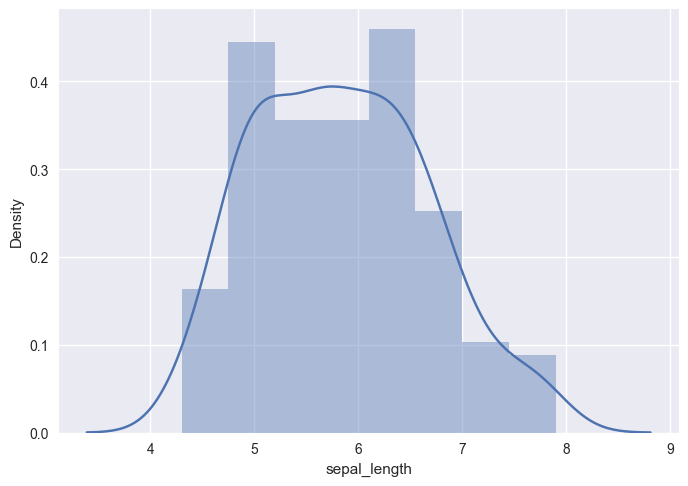

In [6]:
sns.distplot(df['sepal_length'])

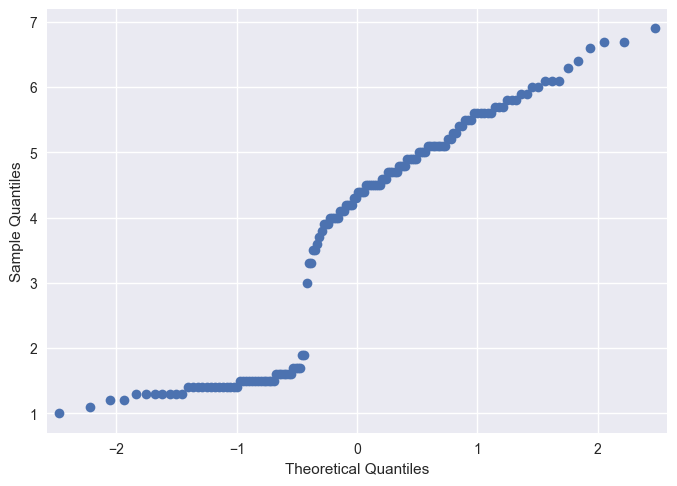

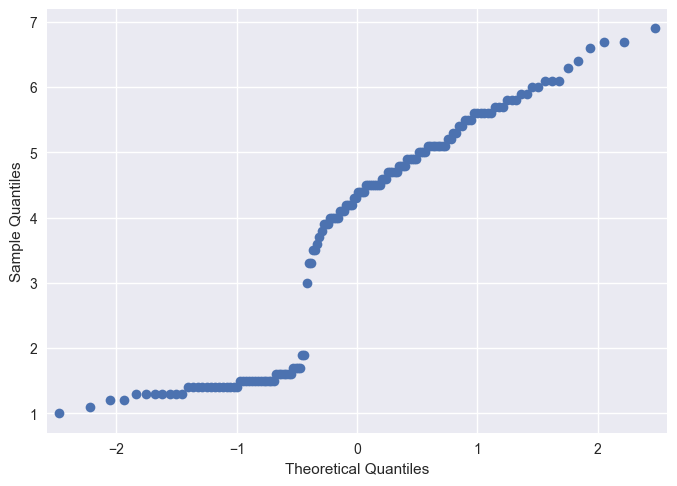

In [15]:
# pip install statsmodels
from statsmodels.graphics.gofplots import qqplot

#qq norm plot 
qqplot(df['petal_length'])

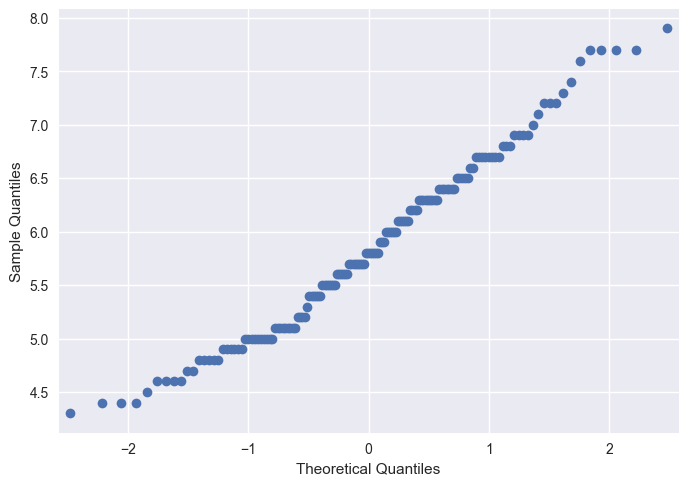

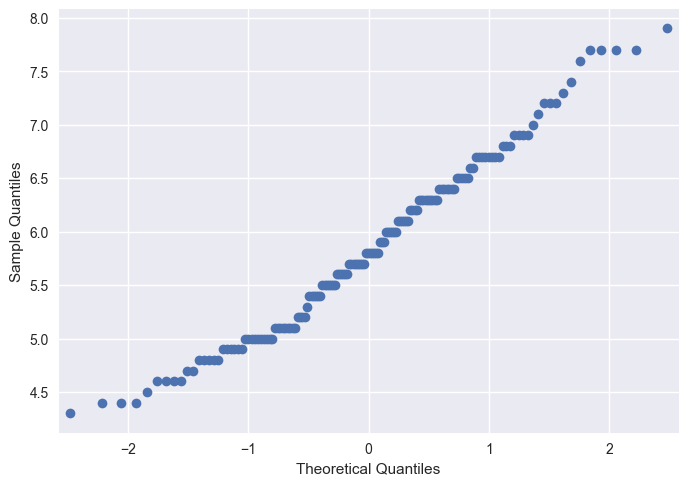

In [16]:
qqplot(df['sepal_length'])

In [22]:
# sphairo normality test
from scipy.stats import shapiro
stat, p= shapiro(df['sepal_length'])
print('stat=',stat,'p=', p)
if p> 0.05:
    print('Data is normal')
else:
    print ('Data is not normal')

stat= 0.9760899543762207 p= 0.01018026564270258
Data is not normal


In [ ]:
# D Agostino k^2 normality test
from scipy.stats import normaltest
stat, p= normaltest(df['sepal_length'])
print('stat=',stat,'p=', p)
if p> 0.05:
    print('Data is normal')
else:
    print ('Data is not normal')

# Anderson darling test

In [30]:
from scipy.stats import anderson
# slect the column for normal distribution test
result= anderson(df['sepal_length'])
print('stat = %.3f' %(result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic< cv:
        print('probabaly Gassian at %0.1f%%' % (sl))
    else:
        print('probable not Guassian at the % .1f%%' %(sl))

stat = 0.889
probable not Guassian at the  15.0%
probable not Guassian at the  10.0%
probable not Guassian at the  5.0%
probabaly Gassian at 2.5%
probabaly Gassian at 1.0%
